# **Text to Image Project**

# Using Hugging Face Stable Diffusion

In [ ]:
!nvidia-smi

Mon Dec  4 04:22:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#install the library’s training dependencies
!cd /content/
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt
#!pip install git+https://github.com/huggingface/diffusers.git

#!pip install torch==2.1.0+cu118 torchvision==0.11.1+cu118 torchaudio==0.10.0+cu118 -f https://download.pytorch.org/whl/cu118/torch_stable.html

#!pip install torch==2.1.0+cu111 torchvision==0.11.1+cu111 torchaudio==0.10.0+cu111 -f https://download.pytorch.org/whl/cu111/torch_stable.html

!pip install torchvision==0.11.1+cu111 torchaudio==0.10.0+cu111 -f https://download.pytorch.org/whl/cu111/torch_stable.html

!pip install --upgrade tensorflow==2.15.0


fatal: destination path 'diffusers' already exists and is not an empty directory.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 2.6 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.25.0.dev0-py3-none-any.whl size=1767386 sha256=4146dbd3847ef9ed5a74b02f25cfab22d3c65eb641a55b9a17b4ddc65d6594dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-oqo_q8vb/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.4.0
    Uninstalling fsspec-2023.4.0:
      Successfully uninstalled fsspec-2023.4.0
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.25.0.dev0
    Uninstalling diffusers-0.25.0.dev0:
      Successfully uninstalled diffusers-0.25.0.dev0
ERROR: pip's dep

In [ ]:
#get tokens
#!huggingface-cli login

from huggingface_hub import notebook_login
notebook_login()

# Quick Tour - Inference Testing

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import PIL
from PIL import Image


In [ ]:
model_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.25.0.dev0",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

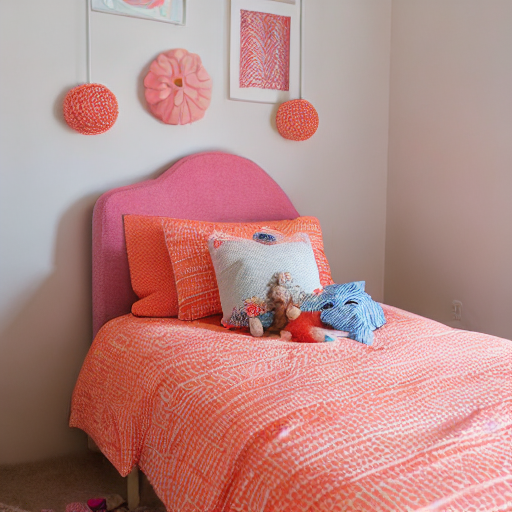

In [ ]:
image = pipe("Coral Bohemain Kids Bedroom").images[0]
image

# Dataset

In [ ]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = "/content/dataimages.zip"

# Specify the extraction directory
extracted_dir = "/content/dataimages"

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print(f"Successfully unzipped '{zip_file_path}' to '{extracted_dir}'.")

Successfully unzipped '/content/dataimages.zip' to '/content/dataimages'.


In [ ]:
!pip install datasets

import pandas as pd
from datasets import load_dataset

# Load CSV metadata file
metadata_file_path = "/content/dataimages/dataimages/metadata.csv"
metadata_df = pd.read_csv(metadata_file_path)

# Extract file names and corresponding text
file_names = metadata_df['file_name'].tolist()
texts = metadata_df['text'].tolist()

# Create a list of dictionaries with 'file_name' and 'text' keys
metadata_list = [{'file_name': file_name, 'text': text} for file_name, text in zip(file_names, texts)]

# Load the dataset using the modified metadata
dataset = load_dataset("imagefolder", data_dir="/content/dataimages/dataimages", drop_labels=True)

# Save the modified metadata with the correct caption column name
metadata_file_path_modified = "/content/dataimages/dataimages/metadata_modified.csv"
metadata_df.to_csv(metadata_file_path_modified, index=False)

# Optionally, you can print the first few examples to check if the data is loaded and processed correctly
print(dataset['train'][:5])

# Push to the Hugging Face Hub
#dataset.push_to_hub("fadeke/clavis_studio_dataset_2")

Resolving data files:   0%|          | 0/74 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3840x2160 at 0x7CA501440640>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3840x2160 at 0x7CA501443A90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x7CA501443490>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1011 at 0x7CA501443E20>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x7CA501443580>], 'text': ['Kitchen dining space earthy tones terracotta contemporary furnishings mid century', 'Dining room space earthy tones contemporary furnishings mid century', 'Botanical bedroom earthy creamy whites wallpaper soft light', 'Charcoal Industrial Bedroom', 'Chic Art Deco Dining Room']}


# Training / Fine-tuning Stable Diffusion

In [ ]:
#initialize an 🤗 Accelerate environment

!accelerate config default --mixed_precision fp16


Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [ ]:
#Configure our environment variables

import os

os.environ['MODEL_NAME'] = f"CompVis/stable-diffusion-v1-4"
os.environ['TRAIN_DIR'] = f"/content/dataimages/dataimages"    ##'TRAIN_DIR or DATASET_NAME'
os.environ['OUTPUT_DIR'] = f"/content/clavis_studio_saved_model_v2b"  ### automatically saved on colab?


In [ ]:
!pip install --force-reinstall --pre torch --index-url https://download.pytorch.org/whl/nightly/cu117

Looking in indexes: https://download.pytorch.org/whl/nightly/cu117
^C


In [ ]:
#Running Training script using HuggingFace accelerate
# 400 steps selected (default is 15,000...thats too much) and 134 epochs (default)

!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --train_data_dir=$TRAIN_DIR \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=400 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --push_to_hub \
  --checkpointing_steps=5000 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --caption_column=text \
  --output_dir=$OUTPUT_DIR


2023-12-04 04:25:59.769224: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 04:25:59.769332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 04:25:59.929647: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 04:26:03.072036: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
12/04/2023 04:26:04 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'dynamic_thresholding_ratio', 'clip_sample_range', 'sample_max_value', 'p

Inference - Check the output of the model

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
#from PIL import image

model_path = "/content/clavis_studio_saved_model_v2b"
pipeline = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16, use_safetensors=True, use_auth_token=True)
pipeline.to("cuda")

image = pipeline(prompt="Scandinavian Living Room").images[0]
image
#image.save("Scandinavian Living Room")

In [ ]:
#save a checkpoint
  #--checkpointing_steps=500....included above under training script

In [ ]:
#load checkpoint
  #--resume_from_checkpoint="checkpoint-1500"

In [ ]:
#PRIVACY!!! ***Store your model on the Hub***
##  --push_to_hub